#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [1]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv('/content/Salaries.csv')
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


#Data Exploration

In [2]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


In [4]:
df.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

number of rows: 148654

number of features: 13

There is no values in Notes and Status so it is not important or affect on target.

# Descriptive Statistics

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,148654.0,74327.500000,42912.857795,1.00,37164.250,74327.50,111490.750,148654.00
BasePay,148045.0,66325.448840,42764.635495,-166.01,33588.200,65007.45,94691.050,319275.01
OvertimePay,148650.0,5066.059886,11454.380559,-0.01,0.000,0.00,4658.175,245131.88
OtherPay,148650.0,3648.767297,8056.601866,-7058.59,0.000,811.27,4236.065,400184.25
Benefits,112491.0,25007.893151,15402.215858,-33.89,11535.395,28628.62,35566.855,96570.66
TotalPay,148654.0,74768.321972,50517.005274,-618.13,36168.995,71426.61,105839.135,567595.43
TotalPayBenefits,148654.0,93692.554811,62793.533483,-618.13,44065.650,92404.09,132876.450,567595.43
Year,148654.0,2012.522643,1.117538,2011.00,2012.000,2013.00,2014.000,2014.00
Notes,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Status,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Cleaning

In [6]:
df=df.drop(['Notes','Status'],axis=1)

In [7]:
df['Agency'].unique()

array(['San Francisco'], dtype=object)

1-The agency of all set is San Francisco and there is no missing data in this column so we could drop it because There is no distinction between jobs by Agency.

2-The EmployeeName is not important in our study and not affect the salay evenif it is missing so we could drop it.

3-The Id is not important in our study and not affect the salay evenif it is missing so we could drop it.


In [8]:
df=df.drop(['Agency','EmployeeName','Id'],axis=1)

In [9]:
df['JobTitle'].unique()

array(['GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY',
       'CAPTAIN III (POLICE DEPARTMENT)',
       'WIRE ROPE CABLE MAINTENANCE MECHANIC', ..., 'Conversion',
       'Cashier 3', 'Not provided'], dtype=object)

**Observation :**

There is Jobtitle is not provided but in our study it is important to specify the jobtitle because our target is the salary in Sanfrancisco so we could drop the joptitle that is not provided.

In [10]:
df=df.drop(df[df['JobTitle'] == 'Not provided'].index)

In [11]:
df[df['BasePay'].isna()]

,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
81391,Deputy Chief 3,NaN,0.0,149934.11,0.00,149934.11,149934.11,2013
84506,Licensed Vocational Nurse,NaN,0.0,110485.41,20779.00,110485.41,131264.41,2013
84960,Park Patrol Officer,NaN,0.0,120000.00,8841.48,120000.00,128841.48,2013
90525,Police Officer 3,NaN,0.0,106079.31,0.00,106079.31,106079.31,2013
90786,Deputy Sheriff,NaN,0.0,81299.02,23877.53,81299.02,105176.55,2013
...,...,...,...,...,...,...,...,...
110526,PS Aide Health Services,NaN,0.0,10.67,0.00,10.67,10.67,2013
110527,Senior Clerk,NaN,0.0,5.56,0.00,5.56,5.56,2013
110528,Police Officer 3,NaN,0.0,0.00,-2.73,0.00,-2.73,2013
110529,Police Officer 3,NaN,0.0,0.00,-8.20,0.00,-8.20,2013


1-To fill Basepay column we subtract totalpay from overtimepay and otherpay.

2-To fill Benefits Column we subtract TotalPayBenefits from TotalPay.



In [12]:
df['BasePay'].fillna(df['TotalPay'] - (df['OvertimePay'] + df['OtherPay']) , inplace = True)

In [13]:
df['Benefits'].fillna(df['TotalPayBenefits'] - df['TotalPay'] , inplace = True)

In [14]:
df['OvertimePay'].fillna(df['TotalPay'] - (df['BasePay'] + df['OtherPay']) , inplace = True)
df['OtherPay'].fillna(df['TotalPay'] - (df['BasePay'] + df['OvertimePay']) , inplace = True)

In [15]:
df['JobTitle'] = df['JobTitle'].str.lower()

In [16]:
managementDepart = ['head','counselor', 'deputy', 'chief', 'mayor', 'director', 'manager', 'firefighter']
LegalDepart = ['captain', 'officer', 'police', 'attorney']
TransportDepart = ['transit', 'transportation']
HealthDepart = ['nurse', 'health', 'medical', 'anesthetist', 'doctor', 'physician', 'nursing', 'toxicologist']
TechnicalDepart = ['electronic', 'mechanic', "Sheriff's"]

In [17]:
def classifier(JobTitle):
  JobTitle = JobTitle.split()
  for s in JobTitle:
    if s in managementDepart:
      return 'managementDepart'
    elif s in LegalDepart:
      return 'LegalDepart'
    elif s in TransportDepart:
      return 'TransportDepart'
    elif s in HealthDepart:
      return 'HealthDepart'
    elif s in TechnicalDepart:
      return 'TechnicalDepart'
    else:
      return 'OtherDepart'

In [18]:
df['Department'] = df['JobTitle'].apply(lambda x: classifier(x))

In [19]:
perc = pd.DataFrame(df['Department'].value_counts())

In [20]:
perc

,Department
OtherDepart,110712
TransportDepart,11291
managementDepart,11155
LegalDepart,8298
HealthDepart,6597
TechnicalDepart,597


In [21]:
perc.index

Index(['OtherDepart', 'TransportDepart', 'managementDepart', 'LegalDepart',
       'HealthDepart', 'TechnicalDepart'],
      dtype='object')

# Basic Data Visualization

In [22]:
import matplotlib.pyplot as plt

In [23]:
from matplotlib.ticker import PercentFormatter

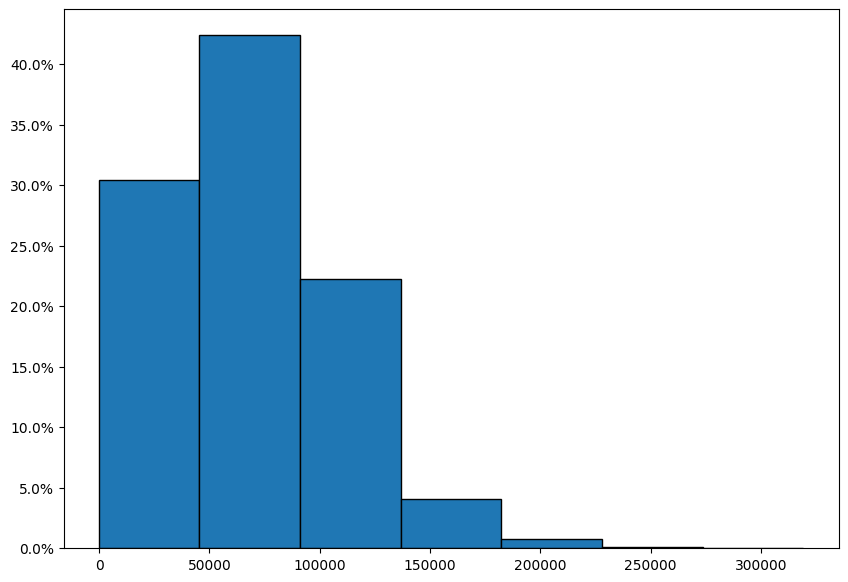

In [24]:
fig, ax = plt.subplots(figsize=(10,7))
n, bins, patches = ax.hist(df['BasePay'], edgecolor='k',weights=np.ones_like(df['BasePay']) / len(df['BasePay']), bins=7)
ax.yaxis.set_major_formatter(PercentFormatter(xmax=1))
plt.show()

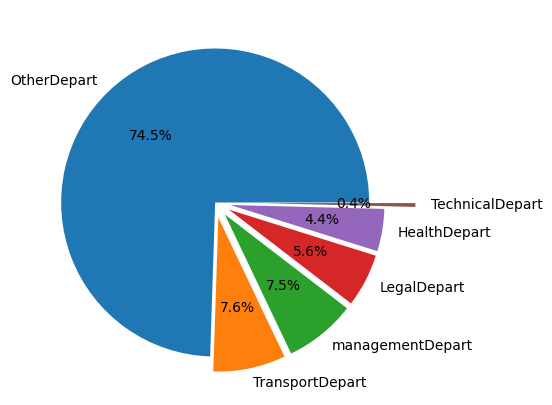

In [25]:
fig, ax = plt.subplots(figsize=(10,5))
explode = (0, 0.1, 0.1, 0.1, 0.1, 0.3)
ax.pie(perc['Department'], labels=perc.index, autopct='%1.1f%%', startangle=0, explode = explode)
plt.show()

# Grouped Analysis

In [54]:
Gdf = df.iloc[: , [6,8] ]
Gdf['Department'].unique()

array(['OtherDepart', 'LegalDepart', 'managementDepart',
       'TechnicalDepart', 'HealthDepart', 'TransportDepart'], dtype=object)

In [63]:
def select_category(k):
  return Gdf[Gdf['Department']==Gdf['Department'].unique()[k]]['TotalPayBenefits']

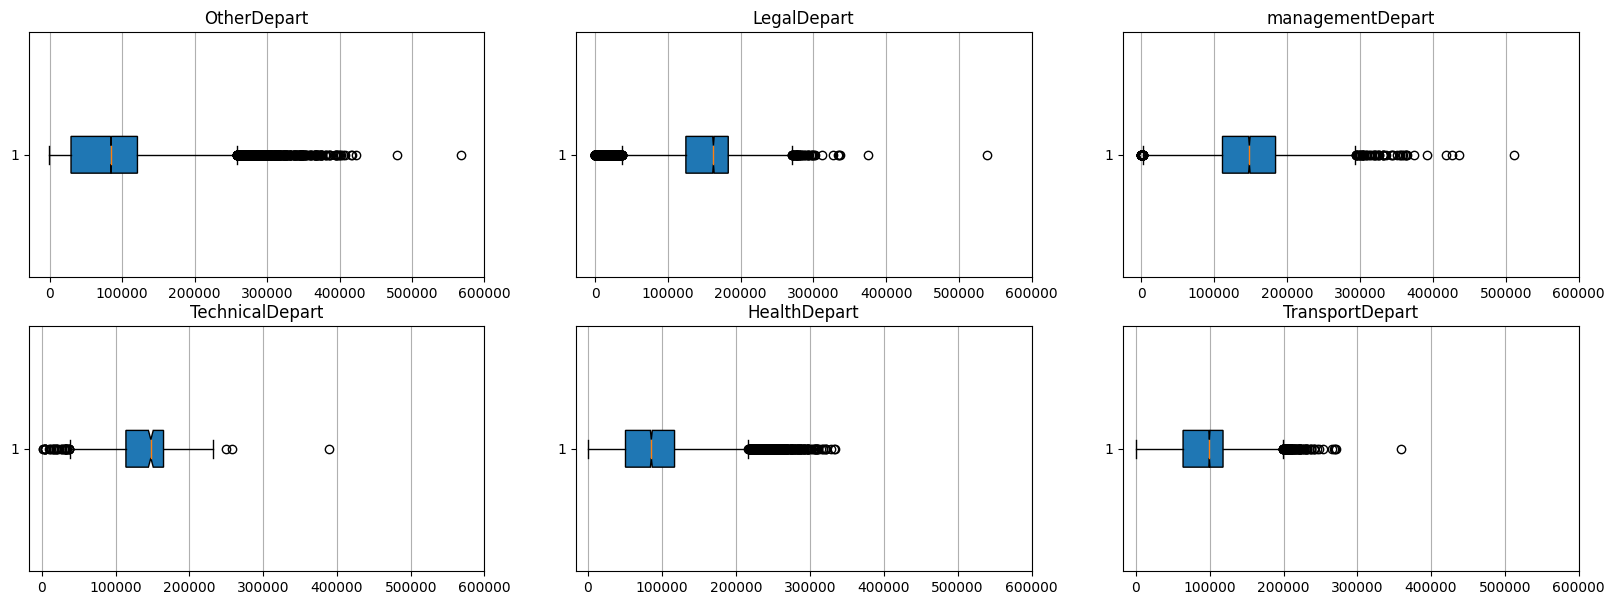

In [76]:
fig, ax = plt.subplots(2,3, figsize=(20,7))
k = 0
for i in range(2):
  for j in range(3):
    ax[i][j].boxplot(select_category(k), vert=False,patch_artist=True,notch=True)
    ax[i][j].set_xticks(np.arange(0 ,700000, 100000))
    ax[i][j].set_title(Gdf['Department'].unique()[k])
    ax[i][j].xaxis.grid(True)
    k+=1
plt.show()

In [66]:
avg_salary = [np.mean(select_category(k)) for k in range(6)]

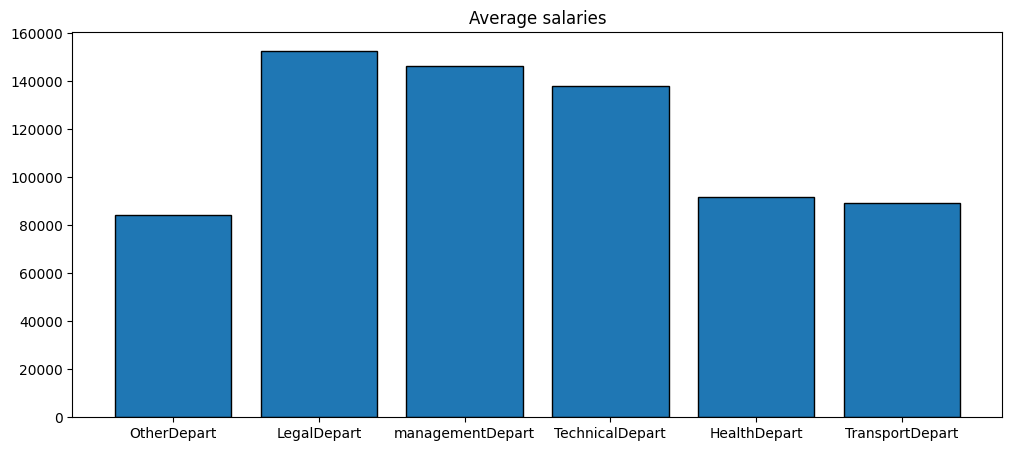

In [83]:
fig, ax = plt.subplots(figsize=(12,5))
ax.bar(list(Gdf['Department'].unique()),avg_salary, edgecolor='k',width=.8)
ax.set_title('Average salaries')
plt.show()

# Simple Correlation Analysis

We can find the relation between total salary and the benefits if there is a relation in most of jobs category.

In [93]:
Cdf = df.iloc[: , [4,5]]
Cdf.head()

,Benefits,TotalPay
0,0.0,567595.43
1,0.0,538909.28
2,0.0,335279.91
3,0.0,332343.61
4,0.0,326373.19


In [100]:
X = Cdf['TotalPay']
y = Cdf['Benefits']

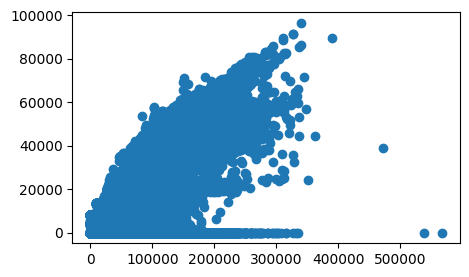

In [107]:
fig, ax = plt.subplots(figsize=(5,3))
ax.scatter(X, y)
plt.show()

In [103]:
cov = np.cov(X, y)
corr = np.corrcoef(X, y)
cov, corr

(array([[2.55188606e+09, 5.48183279e+08],
        [5.48183279e+08, 2.94645112e+08]]),
 array([[1.        , 0.63218695],
        [0.63218695, 1.        ]]))

# Summary of Insights

From Our Study We conclude that:


*   There are about 43% of Jobs in SanFrancisco take between 50,000$ to 100,000$ and about .1% which Work without BaseSalary and depend on Benifits and otherpays.
*   Technical Jobs in SanFrancisco fill about .4% of jobs and that is a few percentage of jobs.
*   Legal Jobs take the greatest average of salaries in SanFrancisco.
*   There are jobs in Legal Jobs take Excessive salaries which considered as outliars in data.

*   There is an almost positive linear relationship between years of experience and Benifits.







# Good Luck!